# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.9998108470759858
4.696939387877576 -0.9998806574195329
4.700940188037608 -0.9999344632927526
4.70494098819764 -0.9999722638344076
4.708941788357672 -0.9999940584394481
4.712942588517704 -0.9999998467590214
4.716943388677736 -0.9999896287004775
4.720944188837768 -0.9999634044273703
4.7249449889978 -0.9999211743594558
4.728945789157832 -0.9998629391726843
4.732946589317864 -0.9997886997991905
4.736947389477896 -0.9996984574272779
4.740948189637928 -0.9995922135014005
4.74494898979796 -0.9994699697221388
4.748949789957992 -0.9993317280461733
4.752950590118024 -0.999177490686253
4.756951390278056 -0.9990072601111596
4.760952190438088 -0.9988210390456685
4.76495299059812 -0.9986188304705051
4.768953790758152 -0.9984006376222968
4.772954590918184 -0.9981664639935212
4.776955391078216 -0.9979163133324505
4.780956191238247 -0.9976501896430915
4.784956991398279 -0.9973680971851213
4.788957791558311 -0.997070040473819
4.792958591718343 -0.9967560242799939
4.796959391878375 -0.9964260536299084

-0.09299107482376921
9.521904380876176 -0.09697378443380962
9.525905181036208 -0.10095494184455105
9.52990598119624 -0.10493448333207289
9.533906781356272 -0.10891234519831959
9.537907581516304 -0.11288846377212025
9.541908381676336 -0.11686277541020781
9.545909181836368 -0.12083521649823767
9.5499099819964 -0.12480572345180599
9.553910782156432 -0.1287742327174674
9.557911582316464 -0.1327406807737523
9.561912382476494 -0.1367050041321819
9.565913182636526 -0.14066713933829122
9.569913982796558 -0.1446270229726346
9.57391478295659 -0.14858459165180757
9.577915583116622 -0.1525397820294597
9.581916383276655 -0.15649253079730857
9.585917183436687 -0.16044277468615312
9.589917983596719 -0.16439045046688633
9.59391878375675 -0.16833549495150726
9.597919583916783 -0.17227784499413257
9.601920384076815 -0.17621743749200708
9.605921184236847 -0.180154209386514
9.609921984396879 -0.18408809766418416
9.61392278455691 -0.1880190393577047
9.617923584716943 -0.19194697154692686
9.621924384876975 

13.946789357871575 0.9819328551557247
13.950790158031607 0.9826820646341466
13.954790958191639 0.9834155449294627
13.958791758351671 0.984133284301308
13.962792558511703 0.984835271261273
13.966793358671735 0.9855214945730874
13.970794158831767 0.9861919432527995
13.974794958991799 0.9868466065689528
13.978795759151831 0.987485474042757
13.982796559311863 0.9881085354482563
13.986797359471895 0.9887157808124926
13.990798159631927 0.9893072004156654
13.994798959791959 0.9898827847912878
13.998799759951991 0.9904425247263369
14.002800560112023 0.9909864112614024
14.006801360272055 0.9915144356908295
14.010802160432087 0.9920265895628582
14.01480296059212 0.9925228646797586
14.018803760752151 0.9930032530979624
14.022804560912183 0.9934677471281897
14.026805361072215 0.9939163393355724
14.030806161232247 0.994349022539773
14.03480696139228 0.9947657898150991
14.038807761552311 0.9951666344906154
14.042808561712343 0.9955515501502492
14.046809361872375 0.9959205306328942
14.050810162032407

18.331666333266654 -0.49504757691742945
18.335667133426686 -0.4915674655271592
18.339667933586718 -0.4880794859209598
18.34366873374675 -0.4845836939287603
18.34766953390678 -0.4810801455055376
18.351670334066814 -0.47756889673042136
18.355671134226846 -0.47405000380579554
18.359671934386878 -0.4705235230563995
18.36367273454691 -0.4669895109284263
18.36767353470694 -0.4634480239886189
18.371674334866974 -0.45989911892336505
18.375675135027006 -0.45634285253778983
18.379675935187038 -0.4527792817548465
18.38367673534707 -0.44920846361440514
18.387677535507102 -0.4456304552723398
18.391678335667134 -0.4420453139996138
18.395679135827166 -0.4384530971813626
18.399679935987198 -0.43485386231597584
18.40368073614723 -0.43124766701417644
18.407681536307262 -0.4276345689980988
18.411682336467294 -0.42401462610036494
18.415683136627326 -0.42038789626315837
18.419683936787358 -0.41675443753729713
18.42368473694739 -0.4131143080813044
18.427685537107422 -0.4094675661604775
18.431686337267454 -0

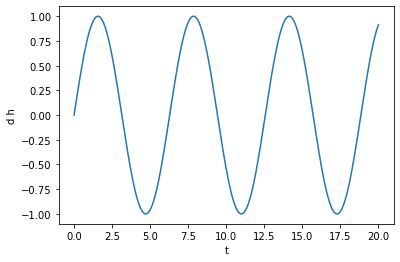

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

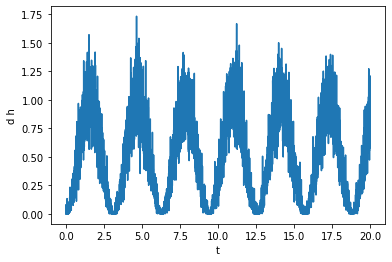

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

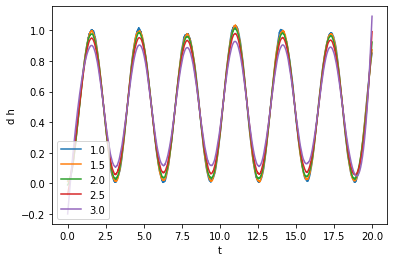

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

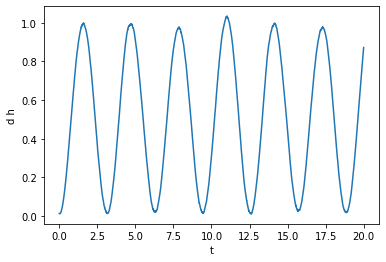

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1639


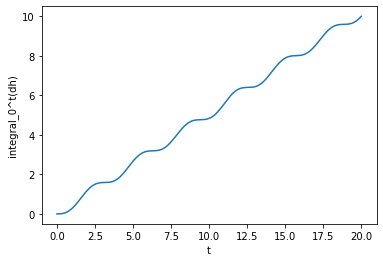

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

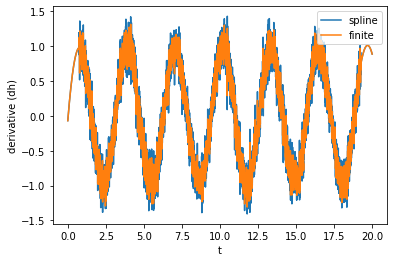

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

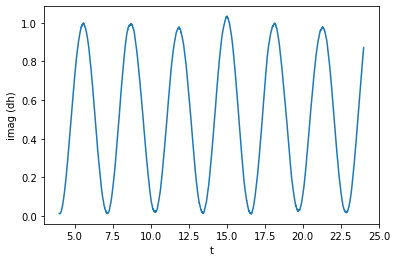

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

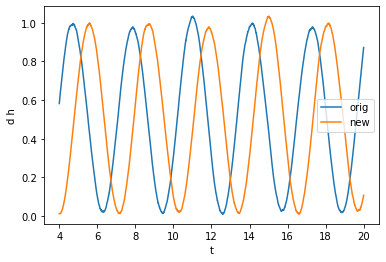

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

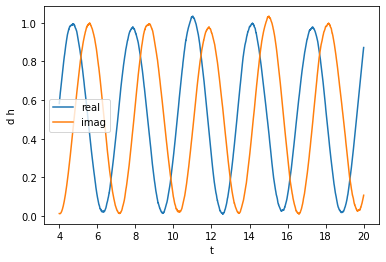

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

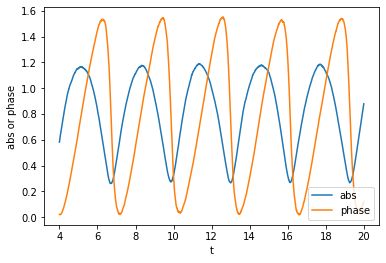

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

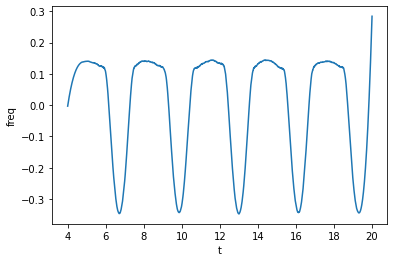

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

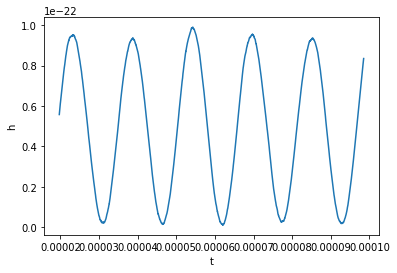

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

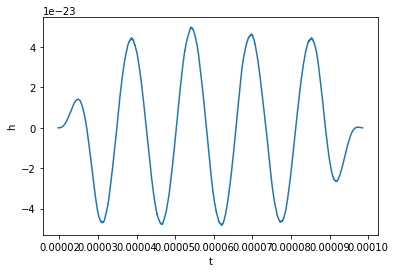

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

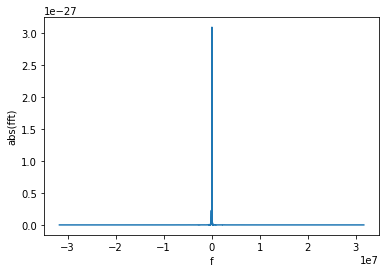

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

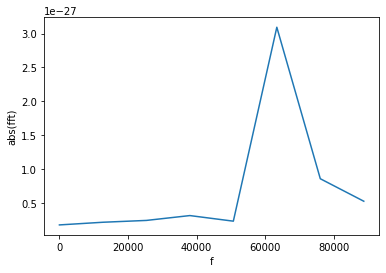

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64211.14


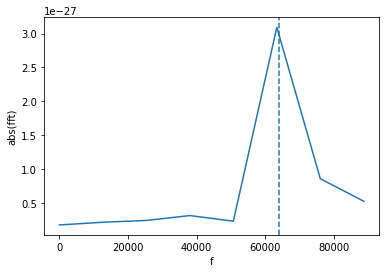

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.093e-27
Maximum with mask 8.577e-28
Length with mask 8
Length after having removed the masked points 7
